### Explore the summary stats by plotting the histogram

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pickle

In [18]:
data = np.load('../../../arco_sims/Arco_data_our_sumstats_v1.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [19]:
x_not_standardized = deepcopy(x)

In [20]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

### Load x_o

In [25]:
import pickle
#with open('../results/observation/x_o_new_ss.pickle', 'rb') as handle:
#    x_o = pickle.load(handle)
    
#x_o = torch.as_tensor(x_o)

x_o = torch.as_tensor(np.load('../results/observation/x_o_new_ss.npz')['x_o'], dtype=torch.float32)

x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

In [26]:
x_o

array([[ 3.0685425 ,  1.3243865 , -2.2863135 ,  1.3567415 ,  4.617212  ,
        -0.16111563, -0.340344  ,  1.0696671 ,  1.4237915 , -2.2668781 ,
         3.8859458 ,  7.21623   , -1.0900493 , -0.8090499 ,  0.59059775,
         1.3262669 , -2.2918801 ,  1.1357762 ,  0.686582  ,  1.1857408 ,
         1.2281904 , -0.418449  ,  1.4189199 , -2.298573  ,  1.118618  ,
         0.22520402,  0.920224  ,  0.3744664 ,  0.07103147,  1.5448475 ,
        -2.2939982 ,  0.94446456, -0.05209108,  1.1674931 ,  0.5262468 ]],
      dtype=float32)

Minimum:   -0.5220493
Maximum:   128.73926


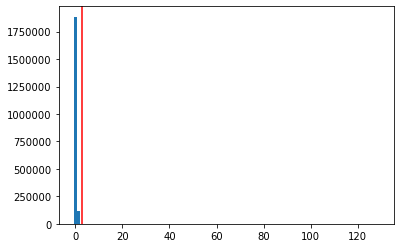

Minimum:   -2.7064693
Maximum:   3.1041603


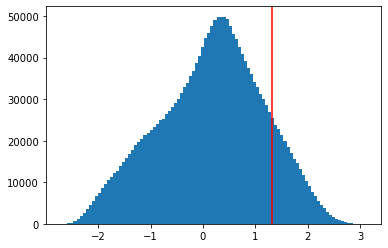

Minimum:   -2.2930691
Maximum:   5.844144


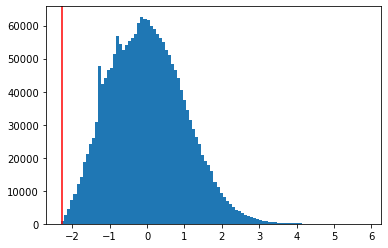

Minimum:   -1.7615459
Maximum:   12.494619


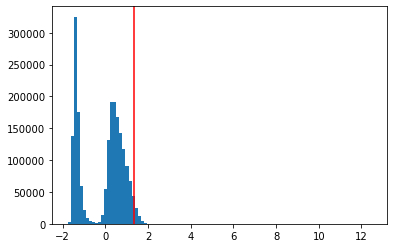

Minimum:   -1.0554122
Maximum:   14.883806


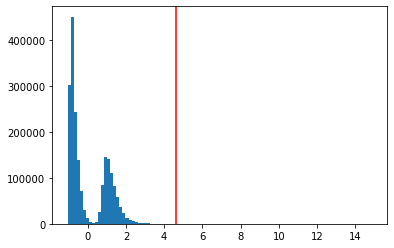

Minimum:   -2.8991795
Maximum:   2.2504532


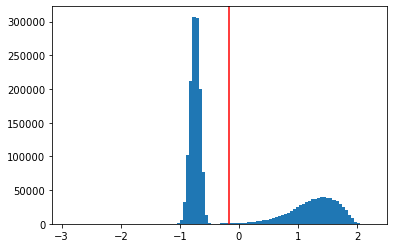

Minimum:   -0.8115148
Maximum:   2.9735732


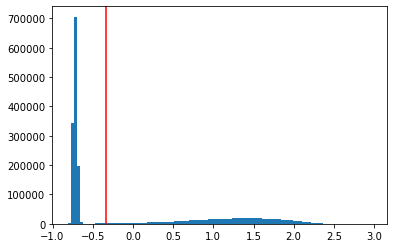

Minimum:   -0.44678465
Maximum:   111.77065


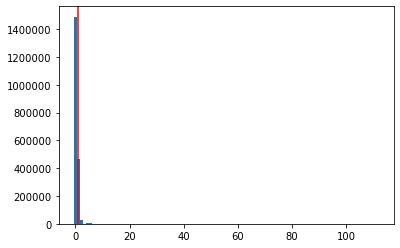

Minimum:   -2.7931187
Maximum:   3.6608312


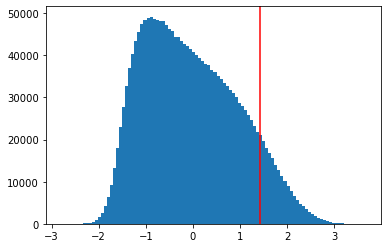

Minimum:   -2.2729316
Maximum:   5.873975


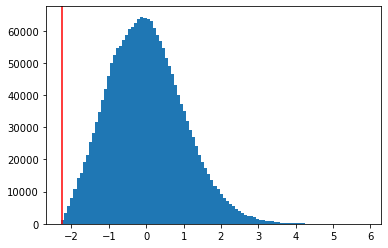

Minimum:   -2.0301526
Maximum:   21.709782


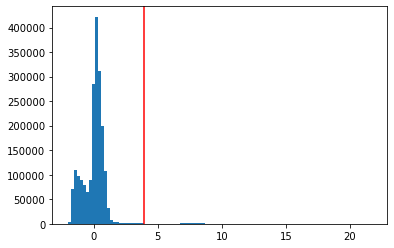

Minimum:   -0.7177881
Maximum:   15.818012


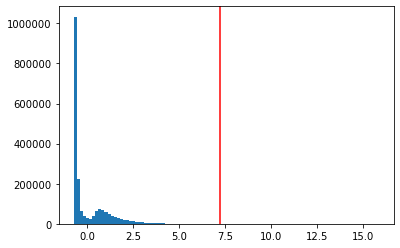

Minimum:   -4.103023
Maximum:   3.5289993


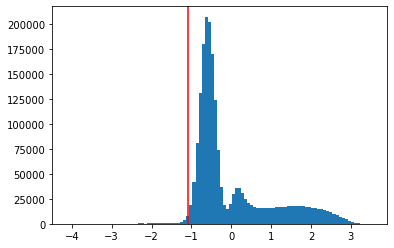

Minimum:   -0.8871844
Maximum:   5.0107703


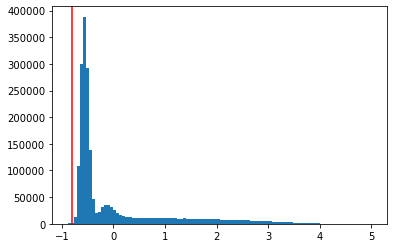

Minimum:   -0.36336255
Maximum:   138.91484


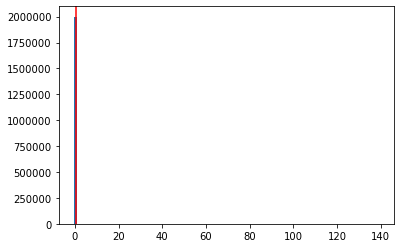

Minimum:   -2.7709756
Maximum:   3.1288102


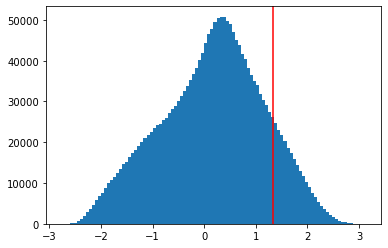

Minimum:   -2.2997158
Maximum:   5.746434


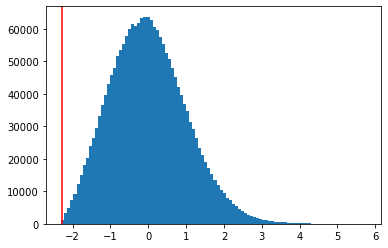

Minimum:   -1.5746117
Maximum:   13.598672


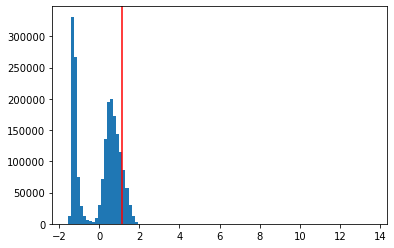

Minimum:   -1.058532
Maximum:   28.195837


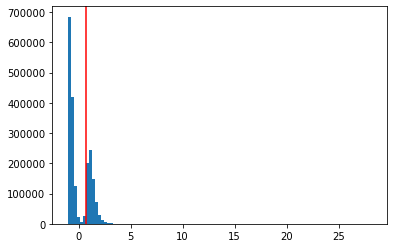

Minimum:   -3.0718818
Maximum:   2.1892004


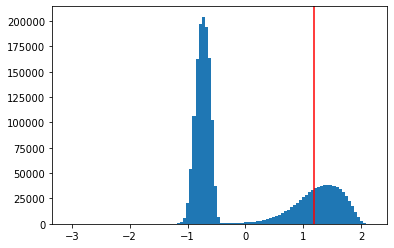

Minimum:   -0.8724367
Maximum:   2.7039862


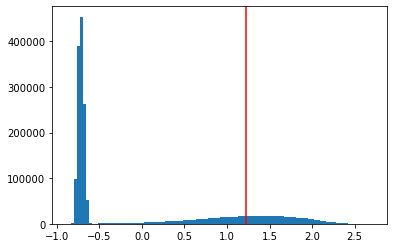

Minimum:   -0.418449
Maximum:   197.01965


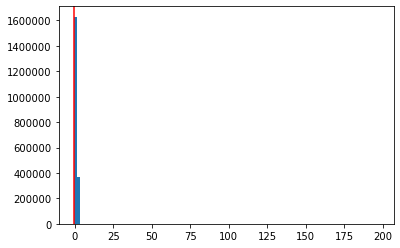

Minimum:   -2.6324215
Maximum:   3.4997697


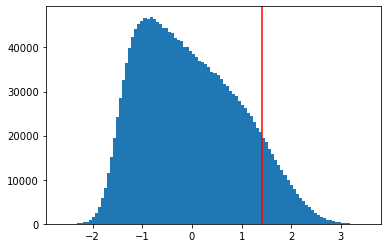

Minimum:   -2.3021638
Maximum:   5.769109


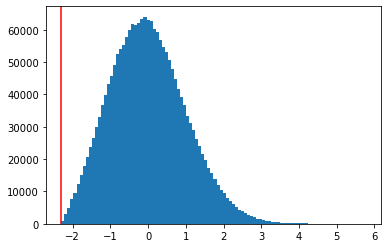

Minimum:   -2.87006
Maximum:   18.588533


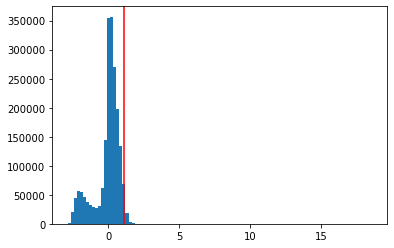

Minimum:   -0.48989376
Maximum:   21.579082


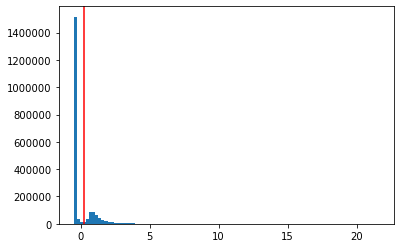

Minimum:   -3.0848348
Maximum:   3.757858


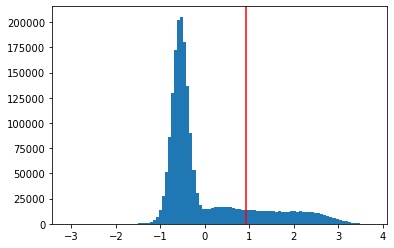

Minimum:   -0.733889
Maximum:   5.3510323


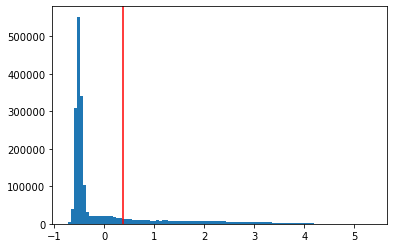

Minimum:   -0.14442958
Maximum:   38.85402


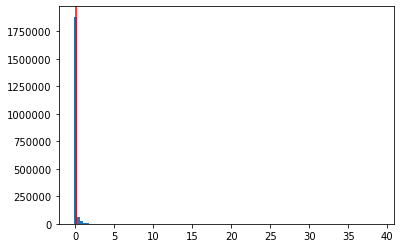

Minimum:   -3.3210073
Maximum:   4.6559505


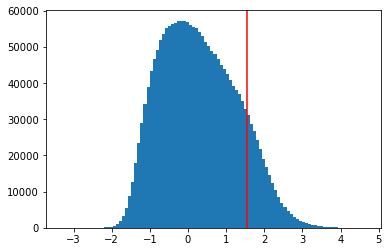

Minimum:   -2.2996068
Maximum:   5.7766366


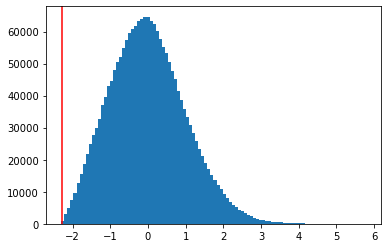

Minimum:   -2.4944355
Maximum:   20.94245


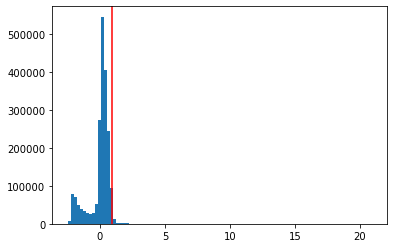

Minimum:   -0.3678844
Maximum:   20.657145


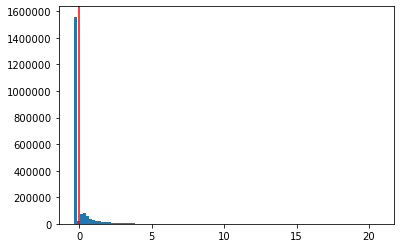

Minimum:   -3.3874965
Maximum:   4.1721277


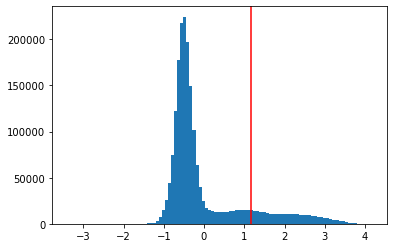

Minimum:   -0.66098636
Maximum:   6.3509974


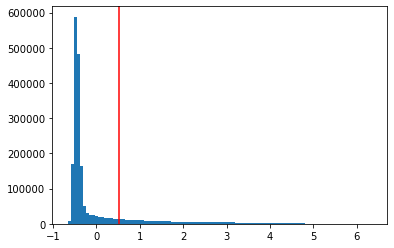

In [27]:
for i in range(35):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()

## Use this to clean up the data
If a sample is larger than 10 standard deviations away from the mean -> discard it because it might break training.

In [28]:
no_value_too_large = np.all(x < 10.0, axis=1)

In [29]:
x_clear = x_not_standardized[no_value_too_large].numpy()
x_clear_standardized = x[no_value_too_large]
theta_clear = theta_not_standardized[no_value_too_large].numpy()

In [30]:
x_clear.shape

(1992007, 35)

In [31]:
no_value_too_small = np.all(x_clear_standardized > -10.0, axis=1)
x_fully_clear = x_clear[no_value_too_small]
theta_fully_clear = theta_clear[no_value_too_small]

In [32]:
x_fully_clear.shape

(1992007, 35)

In [12]:
np.savez('../results/cleaned_up_data2.npz', data=x_fully_clear, params=theta_fully_clear)

### Repeat the whole analysis with the cleaned up dataset just to be sure everything worked

In [33]:
data = np.load('../results/cleaned_up_data2.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [34]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

In [36]:
x_o = torch.as_tensor(np.load('../results/observation/x_o_new_ss.npz')['x_o'], dtype=torch.float32)

x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

Minimum:   -0.7077955
Maximum:   12.544675


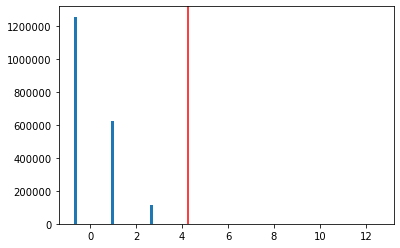

Minimum:   -2.7176726
Maximum:   3.1002824


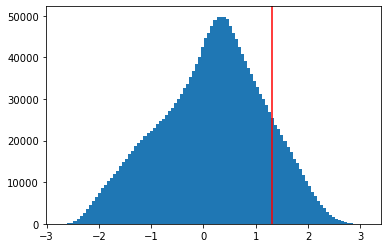

Minimum:   -2.2936792
Maximum:   5.8439784


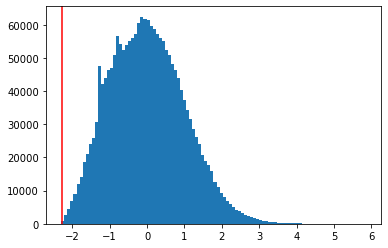

Minimum:   -1.7758272
Maximum:   3.1717703


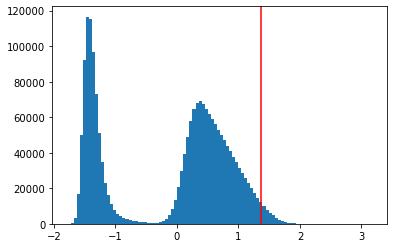

Minimum:   -1.0529552
Maximum:   9.068064


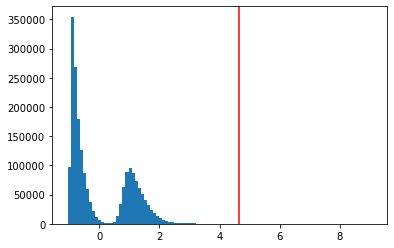

Minimum:   -1.325094
Maximum:   2.1887193


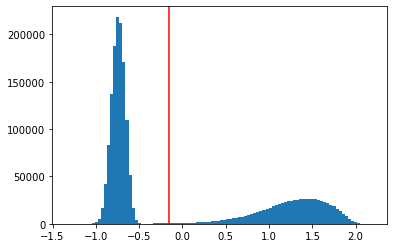

Minimum:   -0.8033734
Maximum:   2.7433746


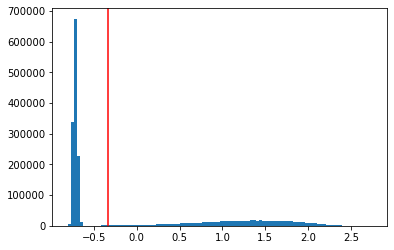

Minimum:   -0.5212071
Maximum:   10.588378


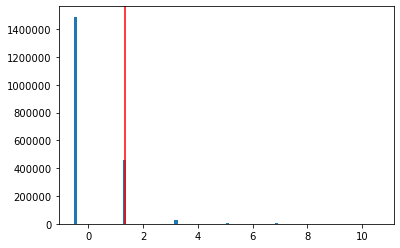

Minimum:   -2.7967637
Maximum:   3.659217


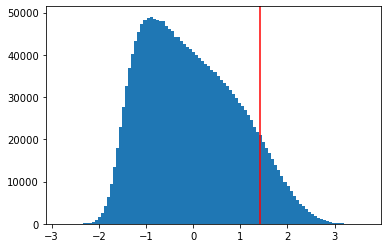

Minimum:   -2.273808
Maximum:   5.874178


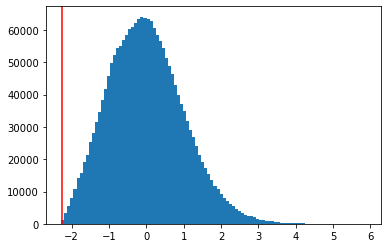

Minimum:   -2.3365386
Maximum:   11.730155


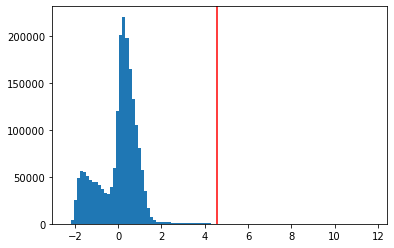

Minimum:   -0.7170338
Maximum:   10.0381775


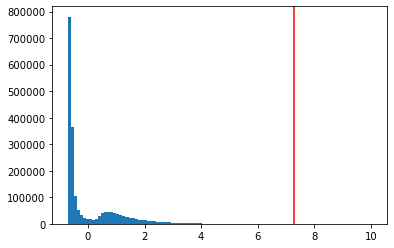

Minimum:   -4.0995083
Maximum:   3.5376003


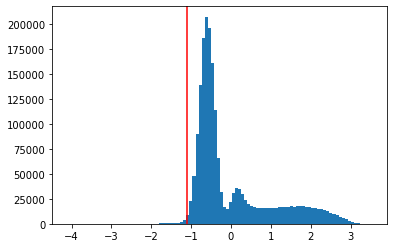

Minimum:   -0.88608485
Maximum:   5.001058


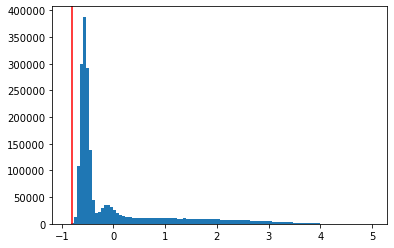

Minimum:   -0.7630444
Maximum:   13.712182


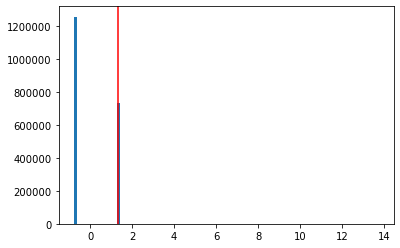

Minimum:   -2.7822964
Maximum:   3.125047


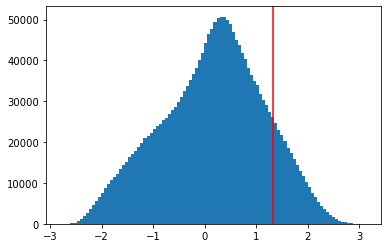

Minimum:   -2.3005345
Maximum:   5.746834


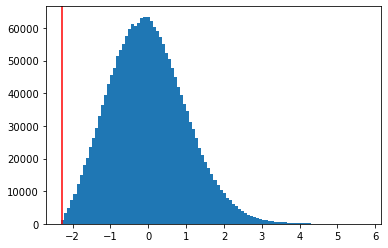

Minimum:   -1.5889096
Maximum:   2.1098416


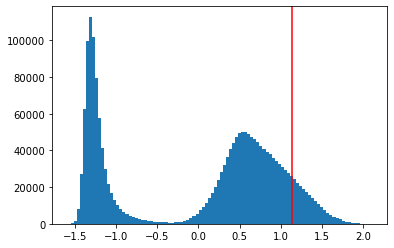

Minimum:   -1.0571946
Maximum:   9.68623


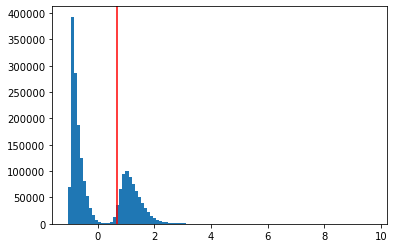

Minimum:   -1.2778456
Maximum:   2.198085


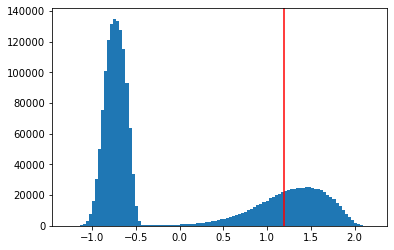

Minimum:   -0.83266073
Maximum:   2.7142856


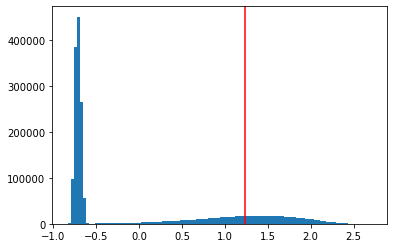

Minimum:   -0.47183642
Maximum:   9.840688


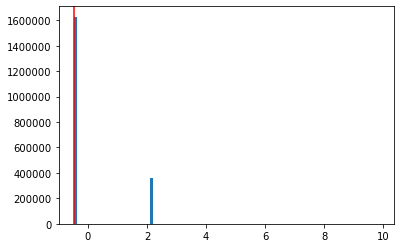

Minimum:   -2.635943
Maximum:   3.4980218


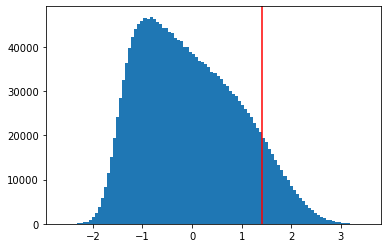

Minimum:   -2.3030329
Maximum:   5.769441


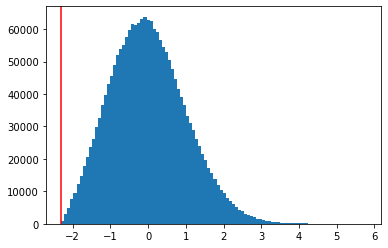

Minimum:   -3.1895232
Maximum:   9.476597


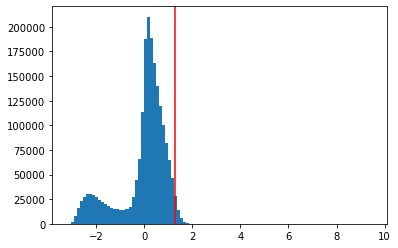

Minimum:   -0.5292291
Maximum:   11.4137945


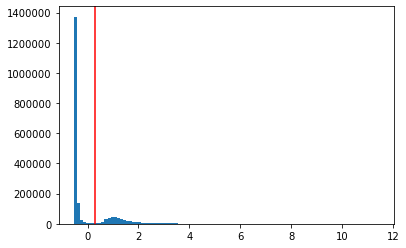

Minimum:   -1.7231853
Maximum:   3.7573555


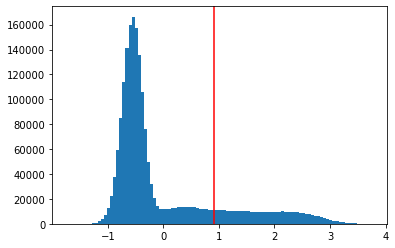

Minimum:   -0.7296606
Maximum:   5.3418546


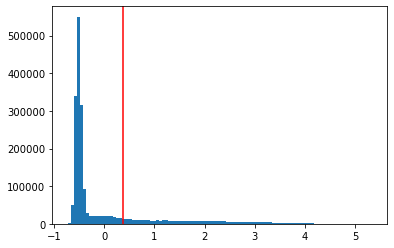

Minimum:   -0.24832965
Maximum:   26.035166


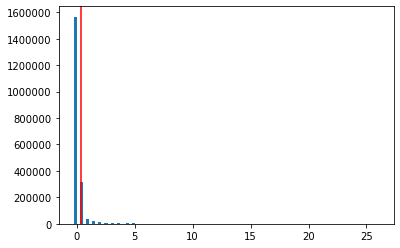

Minimum:   -3.3079782
Maximum:   4.6844134


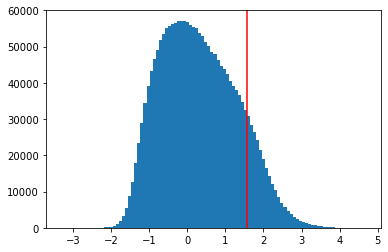

Minimum:   -2.3005085
Maximum:   5.7770343


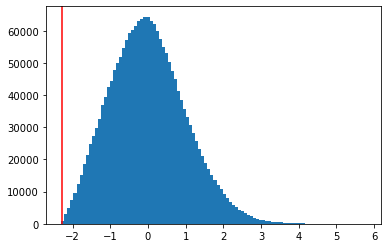

Minimum:   -3.005375
Maximum:   12.23934


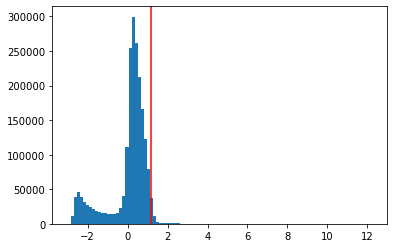

Minimum:   -0.40550232
Maximum:   11.997803


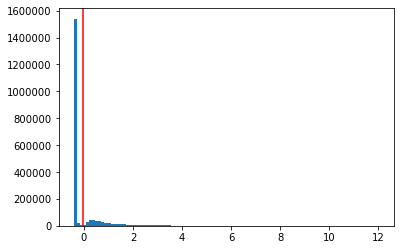

Minimum:   -1.6523019
Maximum:   4.1755724


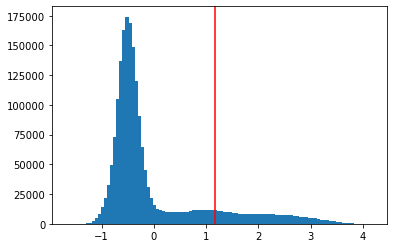

Minimum:   -0.6604772
Maximum:   6.3405533


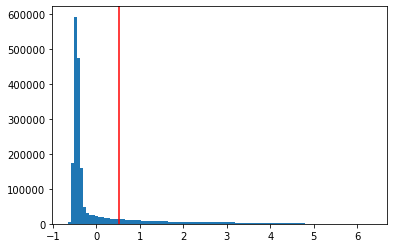

In [37]:
for i in range(35):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()